In [21]:
from data_preprocess import preprocess
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
df_data = preprocess()

/Users/xihegu/Documents/UCSD/MS1/ECE143/proj/dental_hygiene/data_preprocess.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dietary = pd.read_sas(dietary_path if os.path.exists(dietary_path) else dietary_url)
/Users/xihegu/Documents/UCSD/MS1/ECE143/proj/dental_hygiene/data_preprocess.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dietary = pd.read_sas(dietary_path if os.path.exists(dietary_path) else dietary_url)
/Users/xihegu/Documents/UCSD/MS1/ECE143/proj/dental_hygiene/data_preprocess.py:22: PerformanceWarnin

In [42]:

df_data.info()
df_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11196 entries, 0 to 13770
Columns: 245 entries, SEQN to OHXRRESO
dtypes: float64(245)
memory usage: 21.0 MB


,SEQN,WTDRD1PP,WTDR2DPP,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC,OHXRCAR,OHXRCARO,OHXRRES,OHXRRESO
count,11196.000000,11196.000000,1.119600e+04,11196.0,11196.000000,11196.0,11196.000000,11196.000000,11196.000000,11196.000000,...,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000
mean,117149.814219,26606.907687,2.682109e+04,1.0,72.837442,2.0,1.860932,12.085834,4.547517,1.124330,...,1.991604,2.087263,2.134780,2.672740,2.837085,3.638710,1.165416,1.125491,1.219364,1.221508
std,4494.112384,35513.322355,4.279000e+04,0.0,21.412610,0.0,0.346032,12.931712,2.200283,0.467901,...,0.694083,0.828789,0.891006,0.959796,1.001689,0.782775,0.963916,0.954371,0.973303,0.973919
min,109263.000000,805.552485,5.397605e-79,1.0,14.000000,2.0,1.000000,-42.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,113286.750000,8109.894171,5.247106e+03,1.0,73.000000,2.0,2.000000,3.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,117220.500000,15065.105598,1.339989e+04,1.0,81.000000,2.0,2.000000,9.000000,5.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000
75%,121071.500000,30541.012895,3.125570e+04,1.0,86.000000,2.0,2.000000,19.000000,6.000000,1.000000,...,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000
max,124821.000000,538404.429708,7.029436e+05,1.0,94.000000,2.0,2.000000,91.000000,7.000000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.000000,9.000000


In [116]:
df_dietary = pd.concat([df_data.loc[:,"SEQN"], df_data.loc[:,"DSDCOUNT":"DSQTIODI"]], axis = 1)
df_dietary.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11196 entries, 0 to 13770
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11196 non-null  float64
 1   DSDCOUNT  11196 non-null  float64
 2   DSDANCNT  11196 non-null  float64
 3   DSD010    11196 non-null  float64
 4   DSD010AN  11196 non-null  float64
 5   DSQTKCAL  11196 non-null  float64
 6   DSQTPROT  11196 non-null  float64
 7   DSQTCARB  11196 non-null  float64
 8   DSQTSUGR  11196 non-null  float64
 9   DSQTFIBE  11196 non-null  float64
 10  DSQTTFAT  11196 non-null  float64
 11  DSQTSFAT  11196 non-null  float64
 12  DSQTMFAT  11196 non-null  float64
 13  DSQTPFAT  11196 non-null  float64
 14  DSQTCHOL  11196 non-null  float64
 15  DSQTLYCO  11196 non-null  float64
 16  DSQTLZ    11196 non-null  float64
 17  DSQTVB1   11196 non-null  float64
 18  DSQTVB2   11196 non-null  float64
 19  DSQTNIAC  11196 non-null  float64
 20  DSQTVB6   11196 non-null  fl

Top elements that people are taking (measured by the number of respondents giving non-zero answers out of all 11196 respondents):

DSQTVD - Vitamin D (D2 + D3) (mcg) 3692

DSQTVC - Vitamin C (mg) 3450

DSQTVB12 - Vitamin B12 (mcg) 3244

DSQTCALC - Calcium (mg) 3151

DSQTVB6 - Vitamin B6 (mg) 3028



## Pearson Correlation

In [114]:
df_dietary_prepare = df_dietary.loc[:, "DSQTKCAL":]
del df_dietary_prepare["DSQTFDFE"]
count = df_dietary_prepare.astype(bool).sum(axis=0)
count = count.sort_values(ascending=False)
df_dietary_prepare = df_dietary_prepare[count.index]


df_corr = df_dietary_prepare.corr()
np.fill_diagonal(df_corr.values, 0)
df_corr.style.highlight_max(color='red').highlight_min(color='blue')


,DSQTVD,DSQTVC,DSQTVB12,DSQTCALC,DSQTVB6,DSQTFA,DSQTZINC,DSQTKCAL,DSQTNIAC,DSQTIODI,DSQTVB1,DSQTVB2,DSQTCARB,DSQTMAGN,DSQTCOPP,DSQTSELE,DSQTVK,DSQTSUGR,DSQTIRON,DSQTPOTA,DSQTPHOS,DSQTSODI,DSQTTFAT,DSQTLZ,DSQTLYCO,DSQTCHL,DSQTCHOL,DSQTPROT,DSQTPFAT,DSQTFIBE,DSQTSFAT,DSQTMFAT,DSQTCAFF
DSQTVD,0.000000,0.182546,0.115683,0.203020,0.150065,0.186731,0.217607,0.074531,0.113108,0.075511,0.132380,0.111185,0.045713,0.193236,0.163279,0.203220,0.063678,0.055526,0.113445,0.152158,0.059850,0.103958,0.111898,0.074686,0.057451,0.031950,0.057316,0.015766,0.043561,0.020122,0.037109,0.026153,0.015084
DSQTVC,0.182546,0.000000,0.112551,0.252748,0.329268,0.201489,0.547895,0.078695,0.270101,0.121106,0.144943,0.150398,0.045833,0.403450,0.174895,0.566965,0.027200,0.041804,0.060093,0.630696,0.070051,0.389305,0.118732,0.090638,0.038229,0.035786,0.054645,0.018958,0.063693,0.018826,0.031577,0.053546,0.006570
DSQTVB12,0.115683,0.112551,0.000000,0.116935,0.164277,0.256726,0.127154,0.062192,0.066232,0.043657,0.125006,0.093379,0.027882,0.133802,0.100498,0.116611,0.022412,0.020106,0.052879,0.075444,0.054551,0.055669,0.105233,0.103036,0.040253,0.024185,0.046753,0.018567,0.050111,0.021729,0.037113,0.074041,0.009528
DSQTCALC,0.203020,0.252748,0.116935,0.000000,0.179591,0.335743,0.394446,0.166848,0.188051,0.157220,0.148409,0.140918,0.117122,0.365077,0.392019,0.327605,0.082251,0.067806,0.209288,0.258358,0.262317,0.153520,0.181406,0.107273,0.097360,0.067252,0.117794,0.076921,0.090932,0.041387,0.076424,0.055447,0.025252
DSQTVB6,0.150065,0.329268,0.164277,0.179591,0.000000,0.386435,0.308219,0.109740,0.207055,0.097886,0.381507,0.505325,0.058382,0.269759,0.230715,0.430170,0.049039,0.035269,0.044895,0.255208,0.082567,0.175465,0.130311,0.114420,0.109426,0.158810,0.078776,0.072703,0.036153,0.009753,0.060109,0.051348,0.121346
DSQTFA,0.186731,0.201489,0.256726,0.335743,0.386435,0.000000,0.403232,0.149767,0.238583,0.194546,0.325005,0.283318,0.109942,0.274761,0.428141,0.381280,0.089685,0.139379,0.236588,0.196890,0.184424,0.094750,0.161069,0.113228,0.098954,0.106329,0.093058,0.052742,0.066336,0.035136,0.043334,0.049265,0.037016
DSQTZINC,0.217607,0.547895,0.127154,0.394446,0.308219,0.403232,0.000000,0.123017,0.269948,0.203788,0.182527,0.220926,0.070897,0.429864,0.637712,0.604371,0.084633,0.062176,0.159962,0.471424,0.153257,0.260432,0.168610,0.259607,0.132388,0.077820,0.090028,0.059105,0.083668,0.044592,0.037758,0.062347,0.045307
DSQTKCAL,0.074531,0.078695,0.062192,0.166848,0.109740,0.149767,0.123017,0.000000,0.074766,0.052901,0.082083,0.096847,0.864474,0.124068,0.122705,0.115313,0.022668,0.531774,0.032127,0.237516,0.508037,0.365166,0.525391,0.069153,0.066424,0.265747,0.628064,0.724330,0.220880,0.313235,0.491153,0.192150,0.020027
DSQTNIAC,0.113108,0.270101,0.066232,0.188051,0.207055,0.238583,0.269948,0.074766,0.000000,0.087255,0.206237,0.283198,0.037582,0.219084,0.250551,0.280509,0.046496,0.024619,0.072200,0.188223,0.080215,0.105962,0.109057,0.075439,0.055866,0.076336,0.067113,0.030488,0.033065,0.014710,0.022567,0.013093,0.015809
DSQTIODI,0.075511,0.121106,0.043657,0.157220,0.097886,0.194546,0.203788,0.052901,0.087255,0.000000,0.059512,0.070165,0.031902,0.138214,0.183993,0.241377,0.049949,0.039490,0.098393,0.135326,0.076432,0.061143,0.082508,0.042984,0.049914,0.036422,0.036402,0.018437,0.041600,0.008090,0.020350,0.027189,0.011086


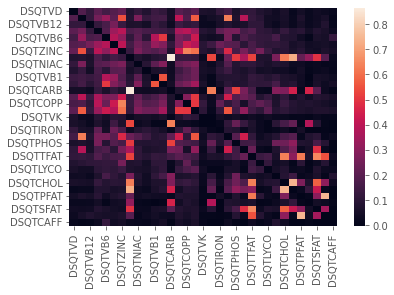

In [115]:
ax = sns.heatmap(df_corr, fmt=".2f")

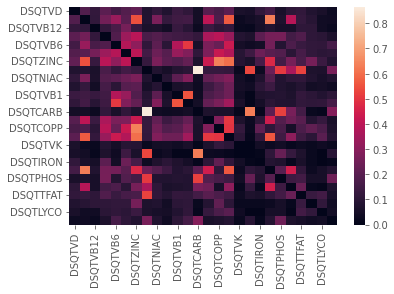

In [113]:
import seaborn as sns
df_corr = df_dietary_prepare.iloc[:, :-7].corr()
np.fill_diagonal(df_corr.values, 0)
 
ax = sns.heatmap(df_corr, fmt=".2f")

In [98]:
print("mean corr: ", np.sum(df_corr.sum())/(len(df_corr) * (len(df_corr)-1)))


mean corr:  0.13410007190357953


mean corr among poor ones:  0.19314293177016845


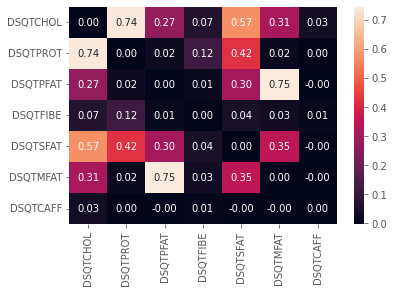

In [111]:
poor_ones = df_dietary_prepare.iloc[:, -7:]
poor_corr = poor_ones.corr()
np.fill_diagonal(poor_corr.values, 0)
print("mean corr among poor ones: ", np.sum(poor_corr.sum())/(len(poor_corr) * (len(poor_corr)-1)))
ax = sns.heatmap(poor_corr, annot=True, fmt=".2f")

mean corr among popular ones:  0.2463029141177096


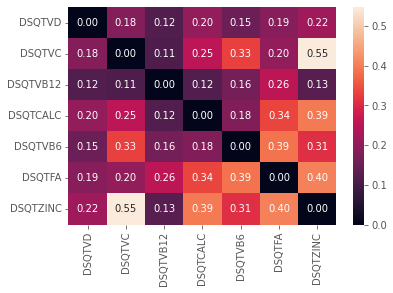

In [117]:


popular_ones = df_dietary_prepare.iloc[:, 0:7]
popular_corr = popular_ones.corr()
np.fill_diagonal(popular_corr.values, 0)
print("mean corr among popular ones: ", np.sum(popular_corr.sum())/(len(popular_corr) * (len(popular_corr)-1)))
ax = sns.heatmap(popular_corr, annot=True, fmt=".2f")


In [50]:
print(len(df_dietary))

11196


### Observe high correlation between:

| Feature 1 | Feature 2 | Corr|
| --- | --- | --- |
|DSQTFA|DSQTFDFE|1.0|
|DSQTKCAL|DSQTCARB|0.86|
|DSQTMFAT|DSQTPFAT|0.75|
|DSQTPROT|DSQTCHOL|0.74|
|DSQTKCAL|DSQTPROT|0.72|


There appear many pairs with correlation > 0.6

In [ ]:
# print(df_corr.stack())
# def is_high_correlation(corr):
#     threshold = 0.8
#     if abs(corr) > threshold:
#         return True
#     else:
#         return False

# df_corr = df_corr.applymap(is_high_correlation)

In [36]:
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')



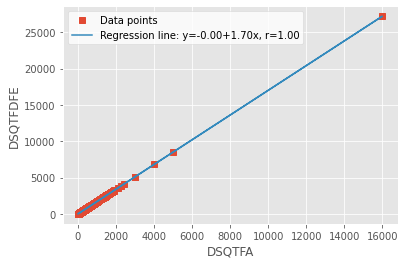

In [37]:
x = df_dietary["DSQTFA"]
y = df_dietary["DSQTFDFE"]

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('DSQTFA')
ax.set_ylabel('DSQTFDFE')
ax.legend(facecolor='white')
plt.show()

DSQTFA: Folic acid (mcg)
DSQTFDFE: Folate, DFE (mcg)g

Same meaning

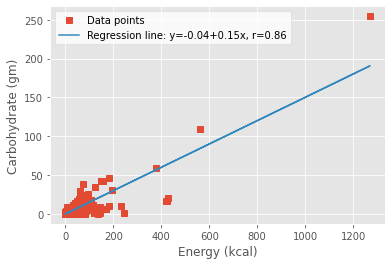

In [38]:
x = df_dietary["DSQTKCAL"]
y = df_dietary["DSQTCARB"]

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Energy (kcal)')
ax.set_ylabel('Carbohydrate (gm)')
ax.legend(facecolor='white')
plt.show()

DSQTKCAL: Energy (kcal)
DSQTCARB: Carbohydrate (gm)

Carbohydrate takes up a great amount of energy intake, so these are highly correlated.

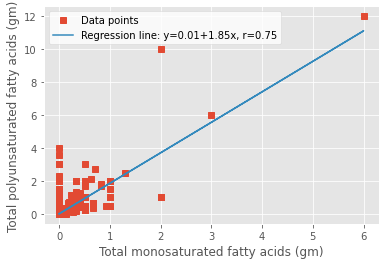

In [39]:
x = df_dietary["DSQTMFAT"]
y = df_dietary["DSQTPFAT"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Total monounsaturated fatty acids (gm)')
ax.set_ylabel('Total polyunsaturated fatty acids (gm)')
ax.legend(facecolor='white')
plt.show()

DSQTMFAT: Total monounsaturated fatty acids (gm)
DSQTPFAT: Total polyunsaturated fatty acids (gm)

Food contain high monounsaturated fatty acids tends to also have high polyunsaturated fatty acids, such as vegetable oils.

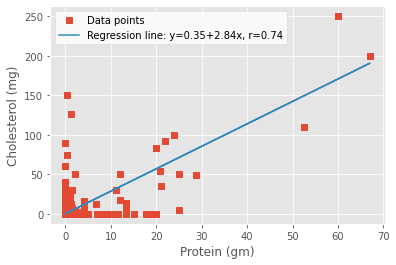

In [40]:
x = df_dietary["DSQTPROT"]
y = df_dietary["DSQTCHOL"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Protein (gm)')
ax.set_ylabel('Cholesterol (mg)')
ax.legend(facecolor='white')
plt.show()

DSQTPROT: Protein (gm)
DSQTCHOL: Cholesterol (mg)

Many food with high protein also has high cholesterol.

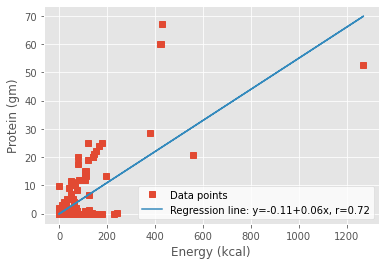

In [41]:

x = df_dietary["DSQTKCAL"]
y = df_dietary["DSQTPROT"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Energy (kcal)')
ax.set_ylabel('Protein (gm)')
ax.legend(facecolor='white')
plt.show()

From the plots above, we definitely should ignore one variable between DSQTFA and DSQTFDFE. However, for other pairs, although they have high pearson correlation, it is mainly led by the outliers. For most of the observations, there is no significant correlation. We can discuss about how we should deal with them.

## Rank Correlation

In [64]:
df_rank_corr = df_dietary.corr(method='spearman')
np.fill_diagonal(df_rank_corr.values, 0)
df_rank_corr.style.highlight_max(color='red').highlight_min(color='blue')

,SEQN,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQTKCAL,DSQTPROT,DSQTCARB,DSQTSUGR,DSQTFIBE,DSQTTFAT,DSQTSFAT,DSQTMFAT,DSQTPFAT,DSQTCHOL,DSQTLYCO,DSQTLZ,DSQTVB1,DSQTVB2,DSQTNIAC,DSQTVB6,DSQTFA,DSQTFDFE,DSQTCHL,DSQTVB12,DSQTVC,DSQTVK,DSQTVD,DSQTCALC,DSQTPHOS,DSQTMAGN,DSQTIRON,DSQTZINC,DSQTCOPP,DSQTSODI,DSQTPOTA,DSQTSELE,DSQTCAFF,DSQTIODI
SEQN,0.000000,-0.028222,-0.001458,0.020627,-0.000623,-0.020571,0.002528,-0.005378,0.001256,-0.001171,-0.027923,0.003715,-0.006752,-0.011803,-0.023402,-0.018883,-0.021046,-0.042500,-0.043208,-0.037666,-0.030074,-0.031247,-0.031267,0.000908,-0.028528,-0.028631,-0.038834,-0.024816,-0.027350,-0.028095,-0.033134,-0.026787,-0.030665,-0.040468,-0.019590,-0.027826,-0.032953,0.002808,-0.030242
DSDCOUNT,-0.028222,0.000000,0.107866,-0.942312,-0.103993,0.580892,0.239615,0.457048,0.322220,0.174336,0.449571,0.186713,0.150289,0.239688,0.338734,0.329272,0.368765,0.564548,0.563366,0.592735,0.656608,0.640936,0.640935,0.269380,0.701238,0.723228,0.469794,0.761153,0.575840,0.381092,0.520639,0.414118,0.625323,0.505124,0.315033,0.408671,0.499586,0.070267,0.535543
DSDANCNT,-0.001458,0.107866,0.000000,-0.093594,-0.992269,0.078901,0.046663,0.072997,0.069410,0.036055,0.035070,0.015512,0.015614,0.023510,0.048785,0.052718,0.027829,0.055765,0.056475,0.075928,0.054791,0.055787,0.055819,0.002005,0.065323,0.061863,0.057811,0.072669,0.459164,0.050970,0.153835,0.043546,0.057090,0.069800,0.169078,0.046610,0.068164,0.024486,0.031718
DSD010,0.020627,-0.942312,-0.093594,0.000000,0.096330,-0.538018,-0.181562,-0.476647,-0.372205,-0.154480,-0.326847,-0.133824,-0.105791,-0.174387,-0.249253,-0.283557,-0.309472,-0.508597,-0.508059,-0.539650,-0.636156,-0.624656,-0.624655,-0.259625,-0.665389,-0.693173,-0.432284,-0.725665,-0.511816,-0.331858,-0.435857,-0.389413,-0.603079,-0.449518,-0.294342,-0.349592,-0.441996,-0.052218,-0.531963
DSD010AN,-0.000623,-0.103993,-0.992269,0.096330,0.000000,-0.079462,-0.046629,-0.071810,-0.069323,-0.036211,-0.035758,-0.015482,-0.015991,-0.023933,-0.049291,-0.053405,-0.028648,-0.055273,-0.055984,-0.075667,-0.054746,-0.055623,-0.055654,-0.002693,-0.065380,-0.062111,-0.056819,-0.073053,-0.459135,-0.051629,-0.153471,-0.042260,-0.056788,-0.068868,-0.167306,-0.047004,-0.069061,-0.024723,-0.031161
DSQTKCAL,-0.020571,0.580892,0.078901,-0.538018,-0.079462,0.000000,0.342056,0.779330,0.683526,0.285327,0.613732,0.267328,0.211979,0.333830,0.440611,0.144759,0.284015,0.227523,0.231203,0.310706,0.505637,0.486388,0.486389,0.363743,0.482239,0.518124,0.175242,0.471727,0.272960,0.214640,0.260459,0.127288,0.457998,0.183843,0.402244,0.199309,0.233329,0.049654,0.430039
DSQTPROT,0.002528,0.239615,0.046663,-0.181562,-0.046629,0.342056,0.000000,0.310532,0.100846,0.263279,0.375642,0.280543,0.205790,0.401933,0.378400,0.097471,0.107607,0.140008,0.139634,0.147763,0.138142,0.130276,0.130316,0.055850,0.136272,0.167336,0.112783,0.152363,0.166252,0.106574,0.179942,0.123211,0.146814,0.138308,0.191400,0.176506,0.151472,0.024764,0.112065
DSQTCARB,-0.005378,0.457048,0.072997,-0.476647,-0.071810,0.779330,0.310532,0.000000,0.804528,0.331580,0.176835,0.137708,0.104385,0.162771,0.166914,0.048278,0.183282,0.173461,0.177790,0.261897,0.489333,0.483667,0.483674,0.352006,0.455582,0.492694,0.146101,0.415672,0.213324,0.150317,0.144207,0.130119,0.423394,0.111225,0.508286,0.114824,0.123708,0.023978,0.432085
DSQTSUGR,0.001256,0.322220,0.069410,-0.372205,-0.069323,0.683526,0.100846,0.804528,0.000000,0.206742,0.034485,0.061740,0.020874,0.006129,0.038541,-0.031863,0.109455,0.023041,0.027965,0.132526,0.406234,0.404782,0.404795,0.389820,0.375047,0.392642,0.012110,0.323583,0.100110,0.098355,0.045830,0.021900,0.339431,-0.030916,0.378409,0.034959,0.029347,0.016108,0.370568
DSQTFIBE,-0.001171,0.174336,0.036055,-0.154480,-0.036211,0.285327,0.263279,0.331580,0.206742,0.000000,0.113425,0.118768,0.043159,0.027440,0.071822,0.049921,0.053729,0.077049,0.077931,0.070082,0.079315,0.075070,0.075098,0.049826,0.066378,0.098969,0.060458,0.059906,0.090083,0.065194,0.104733,0.136218,0.074776,0.

Those pairs with high pearson correlation have rank correlation aroung 0.6+, which is not very high. However, there are several pairs with really significant rank correlation, 0.9+